In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flixster = pd.read_csv('eval/eval_df_douban_rmse.csv',sep = '\t')

In [3]:
flixster.head()

,Unnamed: 0,model_name,activation,hidden_size,learning_rate,lambda,all_rmse,test_rmse,topk,dataset
0,0,UserBiasAE,Sigmoid,300,0.01,1.00,1720.779460,1721.756981,10,douban
1,1,UserBiasAE,Sigmoid,300,0.01,1.00,1720.779460,1721.756981,20,douban
2,2,UserBiasAE,Sigmoid,300,0.01,1.00,1720.779460,1721.756981,50,douban
3,3,UserBiasAE,Sigmoid,300,0.01,1.00,1720.779460,1721.756981,100,douban
4,4,UserBiasAE,Sigmoid,10,0.01,0.01,1733.835942,1724.329054,10,douban


In [7]:
flixster.sort_values('all_rmse',ascending=False,inplace=True)
flixster.head(30)

,Unnamed: 0,model_name,activation,hidden_size,learning_rate,lambda,all_rmse,test_rmse,topk,dataset
333,333,VarAutoRec,PReLU,300,0.010,1.00,1877.16535,1865.198436,20,douban
90,90,VarAutoRec,PReLU,80,0.010,1.00,1877.16535,1865.198436,50,douban
394,394,VarAutoRec,PReLU,80,0.010,100.00,1877.16535,1865.198436,50,douban
511,511,VarAutoRec,PReLU,300,0.005,1.00,1877.16535,1865.198436,100,douban
180,180,VarAutoRec,PReLU,80,0.005,1.00,1877.16535,1865.198436,10,douban
181,181,VarAutoRec,PReLU,80,0.005,1.00,1877.16535,1865.198436,20,douban
182,182,VarAutoRec,PReLU,80,0.005,1.00,1877.16535,1865.198436,50,douban
183,183,VarAutoRec,PReLU,80,0.005,1.00,1877.16535,1865.198436,100,douban
192,192,VarAutoRec,PReLU,300,0.010,100.00,1877.16535,1865.198436,10,douban
509,509,VarAutoRec,PReLU,300,0.005,1.00,1877.16535,1865.198436,20,douban


In [8]:
df = flixster

In [9]:
df['topk'].unique()

array([ 20,  50, 100,  10])

In [10]:
import sqlite3

In [11]:
con = sqlite3.connect("file::memory:?cache=shared")
cur = con.cursor()

In [12]:
df.columns

Index(['Unnamed: 0', 'model_name', 'activation', 'hidden_size',
       'learning_rate', 'lambda', 'all_rmse', 'test_rmse', 'topk', 'dataset'],
      dtype='object')

In [15]:
df = df[['model_name', 'activation', 'hidden_size', 'lambda', 'learning_rate','topk', 'test_rmse','all_rmse', 'dataset']]
df.to_sql('flix', con, if_exists='replace', index=False)

In [23]:
q = """
select model_name,hidden_size,topk,min(test_rmse) as score
from flix
group by model_name,hidden_size,topk
order by min(test_rmse) asc,hidden_size asc,topk asc
"""
best_per_attr = pd.read_sql_query(q,con)

In [24]:
best_per_attr.head(10)

,model_name,hidden_size,topk,score
0,VarAutoRec,10,100,1682.070294
1,UserBiasAE,80,10,1689.928826
2,UserBiasAE,80,20,1689.928826
3,UserBiasAE,80,50,1689.928826
4,UserBiasAE,80,100,1689.928826
5,VarAutoRec,10,10,1691.516038
6,VarAutoRec,10,50,1700.567104
7,VarAutoRec,10,20,1703.380427
8,UserBiasAE,300,10,1704.340762
9,UserBiasAE,300,20,1704.340762


In [25]:
topks = best_per_attr['topk'].unique()
topks

array([100,  10,  20,  50])

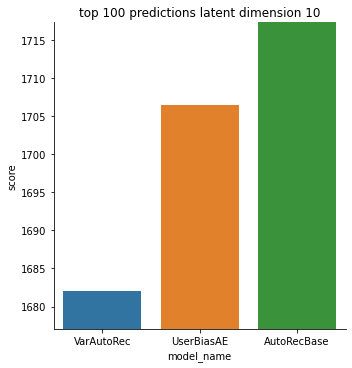

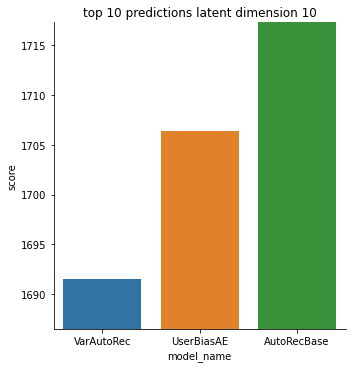

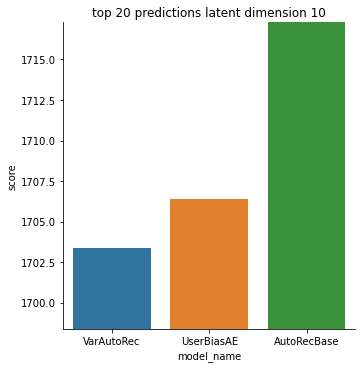

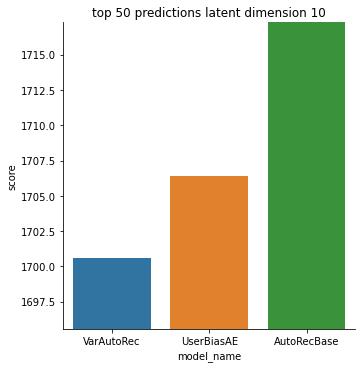

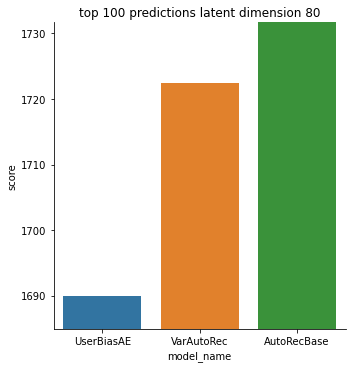

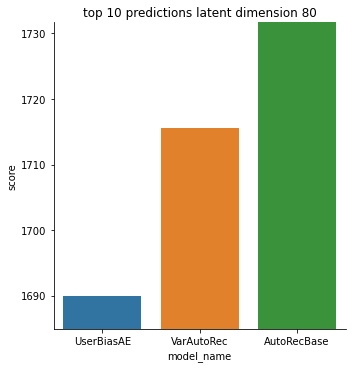

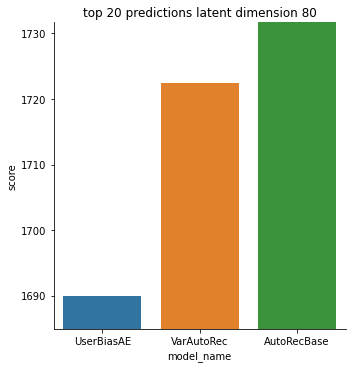

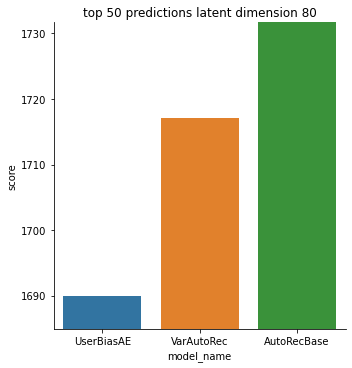

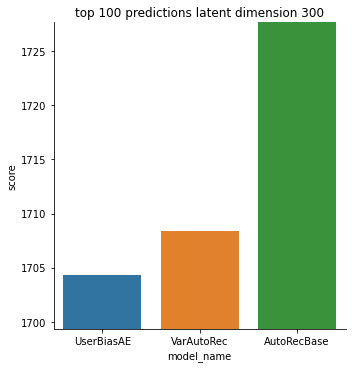

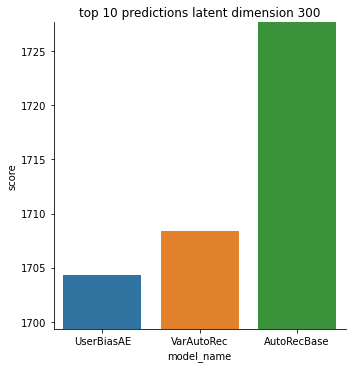

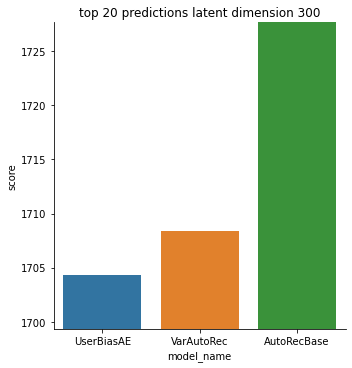

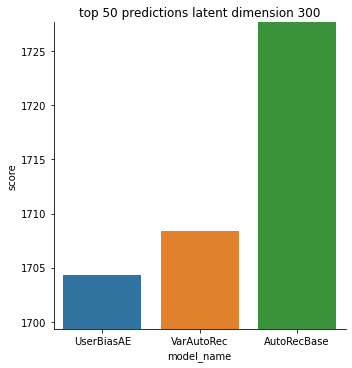

In [38]:
lds = best_per_attr['hidden_size'].unique()
topks = best_per_attr['topk'].unique()
for ld in lds:
    for tk in topks:
        cur_dat = best_per_attr[(best_per_attr['hidden_size']==ld)&(best_per_attr['topk']==tk)]
        name = f'top {tk} predictions latent dimension {ld}'
        g = sns.catplot(data = cur_dat,
                    x='model_name',
                    y='score',
                    col_order=['VarAutoRec', 'UserBiasAE', 'AutoRecBase'],
                   kind="bar").set(title=name)
        g.set(ylim=(cur_dat['score'].min()-5,cur_dat['score'].max()))
        plt.savefig(f'eval/graphs/douban_rmse_{tk}_{ld}.png',bbox_inches='tight')
        plt.show()

In [15]:
df['model'].unique()

array(['VarAutoRec', 'UserBiasAE', 'AutoRecBase'], dtype=object)